Задание 1:
Возьмите файл 4. kNN digits.ipynb  
В нем уже реализована загрузка датасета с рукописными цифрами  
Ваша задача обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn  
Для каждой модели вычислить метрику accuracy на тестовой выборке

In [39]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
digits = datasets.load_digits()

In [4]:
X_digits = digits.data
Y_digits = digits.target

In [6]:
n_samples = len( X_digits )

split = int( n_samples * .9 )

X_train = X_digits[:split]
Y_train = Y_digits[:split]

X_test = X_digits[split:]
Y_test = Y_digits[split:]

Логистическая регрессия

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
Y_test_pred = model.predict(X_test)

In [20]:
model.score( X_test, Y_test )

0.9222222222222223

In [21]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.9222222222222223

Дерево

In [33]:
from sklearn.model_selection import GridSearchCV

In [36]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [37]:
gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_log_loss')

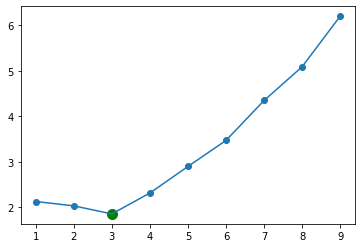

In [40]:
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [52]:
model = DecisionTreeClassifier(max_depth=3)

In [53]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
Y_test_pred = model.predict(X_test)

In [55]:
model.score( X_test, Y_test )

0.46111111111111114

In [56]:
metrics.accuracy_score(Y_test, Y_test_pred)

0.46111111111111114

Соседи

In [81]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [82]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [83]:
knn.score( X_test, Y_test )

0.9777777777777777